In [2]:
import numpy as np
from scipy.io import loadmat
from matplotlib.animation import FuncAnimation
from matplotlib import pyplot as plt
import skimage as sk
import pandas as pd
import time
from mpl_toolkits.mplot3d import Axes3D
import scipy as sp
from mpl_axes_aligner import shift



## **LAB 7**

Load the MRI raw data (rawdata.mat) obtained from a phantom using a spin-warp imaging pulse sequence using either load in Matlab or loadmat in Python. Assign one of the image
dimensions to the readout direction and the other to the phase-encoding direction.

In [3]:
data = loadmat('rawdata.mat')
n = data['rawdata'].shape[0]

# get shape of data
print(data['rawdata'].shape)
color = '#A2142F'
extent = (-127, 127, -127, 127)

# x --> read out direction
# y --> phase encode direction

(256, 256)


All images can be decomposed using Fourier analysis into planar waves with various frequencies, phases, amplitudes, and orientations.  The k-space representation of an MR image is merely an organized collection of these spatial frequencies reflecting that image's spatial harmonic content.

The readout MR signal is stored in k-space which is equivalent to a Fourier plane. K-space is an array of numbers representing spatial frequencies in the MR image. The cells of k-space are commonly displayed on rectangular grid with principal axes $k_x$ and $k_y$. We assigned $k_x$ as the frequency-encode (readout) direction and $k_y$ as the phase-enconding direction.

Frequency-encoding and phase-encoding are done so that data is spatially encoded by differences in frequency and phase, amenable to analysis by Fourier transform. In k-space, fx-coordinates (horizontal spatial frequencies) and fy-coordinates (vertical spatial frequencies) of the Fourier plane are replaced by kx and ky-coordinates. The k-axes represent spatial frequencies in the x- (readout) and y- (phase-enconding) directions rather than positions.

One pixel of the k-space has information about the whole MRI image, and the relevance os that pixel's frequency to the final image.

### **1**. Display the magnitude and phase of the 2D k-space data.

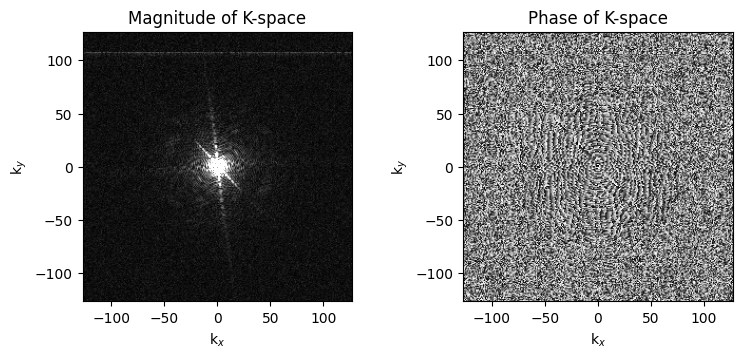

In [4]:
# display the magnitude and phase of the 2D k-space 

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 3.5))
ax1.imshow(np.abs(data['rawdata']), vmin= np.abs(data['rawdata']).min(), vmax= np.abs(data['rawdata']).max()/30,  extent=extent, cmap='gray') #in cmap binary we can see some areas better
ax1.set_title('Magnitude of K-space')
ax1.set_xlabel('k$_x$')
ax1.set_ylabel('k$_y$')

ax2.imshow(np.angle(data['rawdata']), cmap='gray', extent=extent)
ax2.set_title('Phase of K-space')
ax2.set_xlabel('k$_x$')
ax2.set_ylabel('k$_y$')

plt.show()



The brightness of each pixel of the k-space represents the relative contribution (amplitude) of that unique spatial frequency to the final image. Although there is no direct correspondence between the location of a cell in k-space and location of a pixel in the image, different parts of k-space do correspond topologically to spatial frequencies in the MR image. Data near the center of k-space corresponds to low spatial frequencies (i.e., general shapes and contours), whereas data from the periphery relates to high-spatial frequencies (i.e., edges, details). We must not forget that the amplitude is always associated with a phase information.

### 2. Reconstruct the image by Fourier transform and display magnitude and phase of the reconstructed image

In [5]:
# reconstruct the image by fourier transform with numpy

img = np.fft.fftshift(np.fft.ifft2(np.fft.ifftshift(data['rawdata'])))
#plt.imshow(np.abs(img), cmap='gray')
#plt.title('Reconstructed image')
#plt.show()

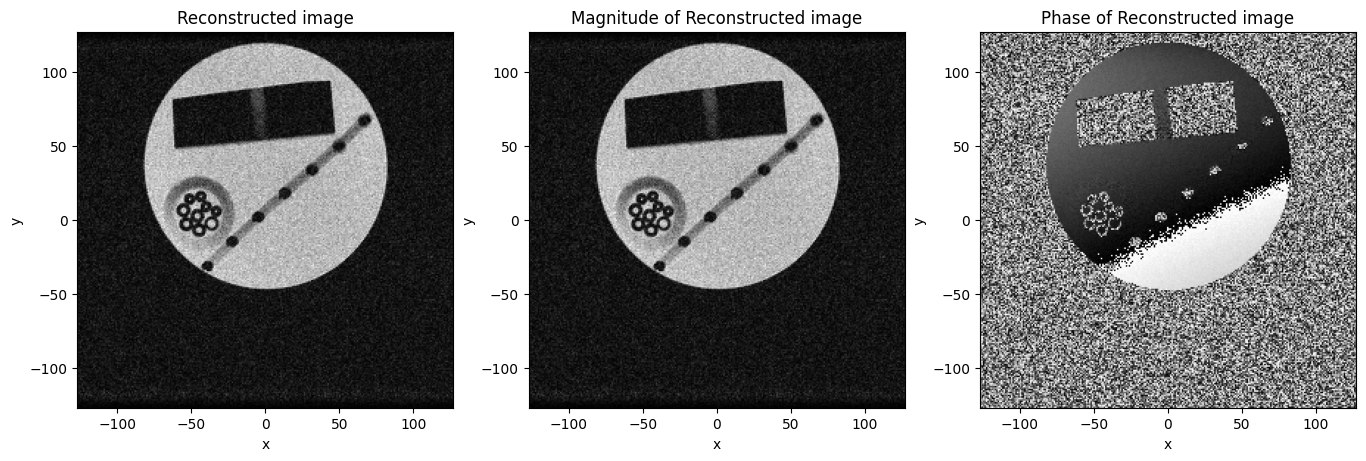

In [6]:
# display a subplot (1,3) with the reconstructed image and the magnitude and phase of the reconstructed image
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16.5, 5))
ax1.imshow(np.abs(img), cmap='gray', extent=extent)
ax1.set_title('Reconstructed image')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax2.imshow(np.abs(img), cmap='gray', extent=extent)
ax2.set_title('Magnitude of Reconstructed image')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax3.imshow(np.angle(img), cmap='gray', extent=extent)
ax3.set_title('Phase of Reconstructed image')
ax3.set_xlabel('x')
ax3.set_ylabel('y')
plt.show()


To go from a k-space data to an image using a 2D inverse Fourier Transform is required.

The phase of the reconstructed image lets us know about the direction of the magnetization in the transverse plane.

### 3. Repeat 1-2, by truncating the k-space data (i.e., reducing kmax and leaving Δk unchanged), by one half, one fourth and one eighth, along the phase-encoding direction.

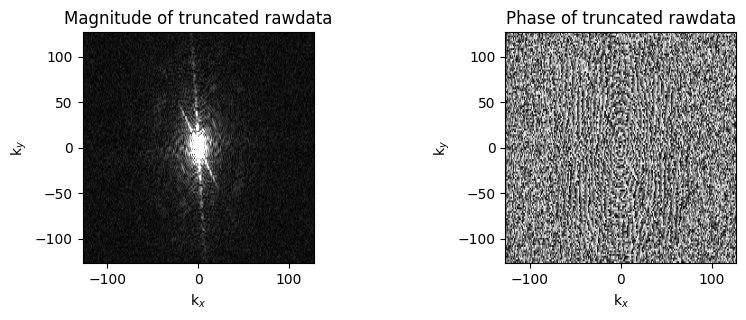

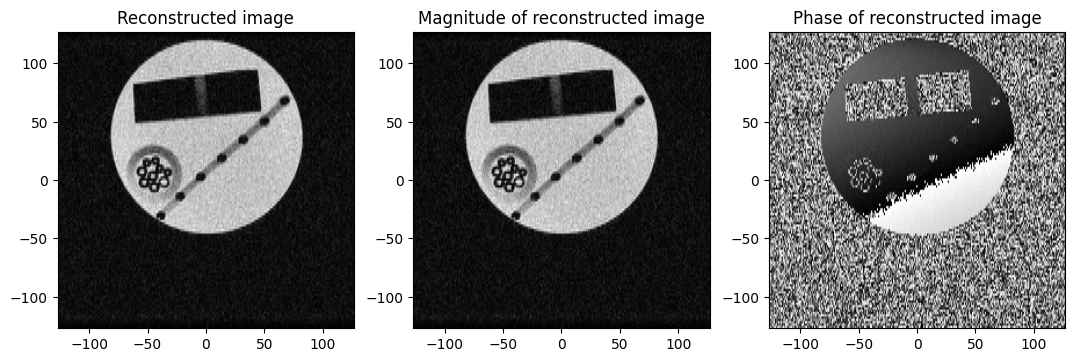

In [7]:

# truncate the phase enconding region of the raw data by one half

rawdata_truncated = data['rawdata'][64:193,:] #temos de truncar sempre a partir do meio! ou seja, ir ao meio (128) e somar e subtrair oq queremos cortar

# get magnitue and phase of the truncated raw data

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3))
ax1.imshow(np.abs(rawdata_truncated),  vmax= np.abs(rawdata_truncated).max()/30, cmap='gray', extent=extent)
ax1.set_title('Magnitude of truncated rawdata')
ax1.set_xlabel('k$_x$')
ax1.set_ylabel('k$_y$')

ax2.imshow(np.angle(rawdata_truncated), cmap='gray', extent=extent)
ax2.set_title('Phase of truncated rawdata')
ax2.set_xlabel('k$_x$')
ax2.set_ylabel('k$_y$')
plt.show()

# reconstruct the image by fourier transform with numpy

img_truncated = np.fft.fftshift(np.fft.ifft2(np.fft.ifftshift(rawdata_truncated)))
#plt.imshow(np.abs(img_truncated), cmap='gray', extent=extent)
#plt.title('Reconstructed image')
#plt.show()

# display magnitude and phase of the reconstructed image

#fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 5))
#ax1.imshow(np.abs(img_truncated), cmap='gray', extent=extent)
#ax1.set_title('Magnitude of reconstructed image')
#ax2.imshow(np.angle(img_truncated), cmap='gray', extent=extent)
#ax2.set_title('Phase of reconstructed image')
#plt.show()

# display a subplot (1,3) with the reconstructed image and the magnitude and phase of the reconstructed image

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(13, 5))
ax1.imshow(np.abs(img_truncated), cmap='gray', extent=extent)
ax1.set_title('Reconstructed image')
ax2.imshow(np.abs(img_truncated), cmap='gray', extent=extent)
ax2.set_title('Magnitude of reconstructed image')
ax3.imshow(np.angle(img_truncated), cmap='gray', extent=extent)

ax3.set_title('Phase of reconstructed image')
plt.show()



In [8]:
# truncate by one fourth

rawdata_truncatedfourth = data['rawdata'][96:161,:] 

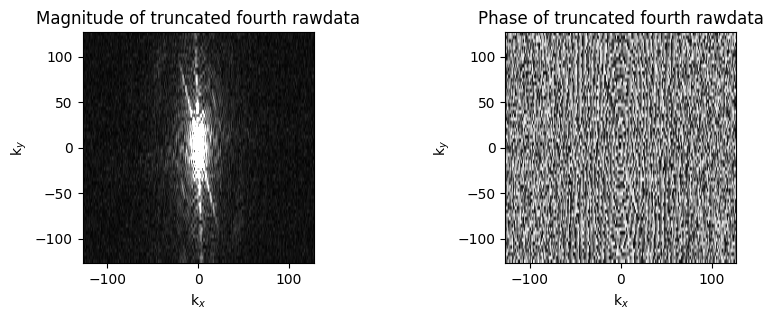

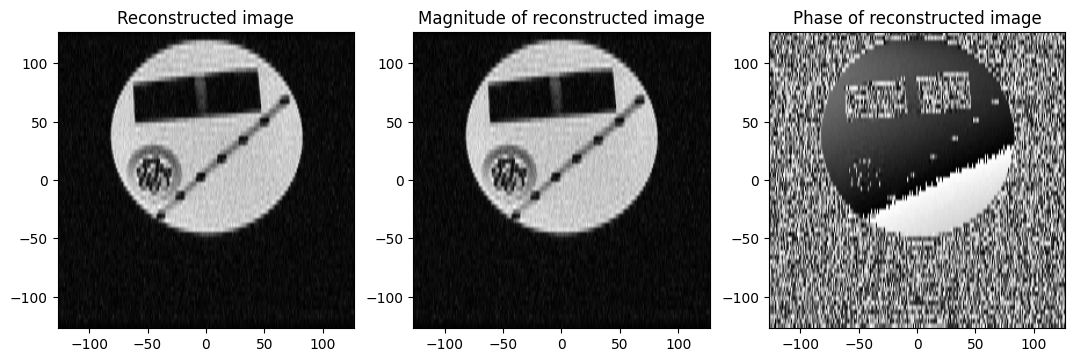

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3))
ax1.imshow(np.abs(rawdata_truncatedfourth),  vmax= np.abs(rawdata_truncatedfourth).max()/30, cmap='gray', extent=extent)
ax1.set_title('Magnitude of truncated fourth rawdata')
ax1.set_xlabel('k$_x$')
ax1.set_ylabel('k$_y$')
ax2.imshow(np.angle(rawdata_truncatedfourth), cmap='gray', extent=extent)
ax2.set_title('Phase of truncated fourth rawdata')
ax2.set_xlabel('k$_x$')
ax2.set_ylabel('k$_y$')
plt.show()

# reconstruct the image by fourier transform with numpy

img_truncated_fourth = np.fft.fftshift(np.fft.ifft2(np.fft.ifftshift(rawdata_truncatedfourth)))
#plt.imshow(np.abs(img_truncated_fourth), cmap='gray', extent=extent)
#plt.title('Reconstructed image')
#plt.show()

# display magnitude and phase of the reconstructed image

#fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 5))
#ax1.imshow(np.abs(img_truncated_fourth), cmap='gray', extent=extent)
#ax1.set_title('Magnitude of reconstructed image')
#ax2.imshow(np.angle(img_truncated_fourth), cmap='gray', extent=extent)
#ax2.set_title('Phase of reconstructed image')
#plt.show()

# display a subplot (1,3) with the reconstructed image and the magnitude and phase of the reconstructed image

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(13, 5))
ax1.imshow(np.abs(img_truncated_fourth), cmap='gray', extent=extent)
ax1.set_title('Reconstructed image')
ax2.imshow(np.abs(img_truncated_fourth), cmap='gray', extent=extent)
ax2.set_title('Magnitude of reconstructed image')
ax3.imshow(np.angle(img_truncated_fourth), cmap='gray', extent=extent)
ax3.set_title('Phase of reconstructed image')
plt.show()


In [10]:
rawdata_truncatedeigth = data['rawdata'][112:145,:]

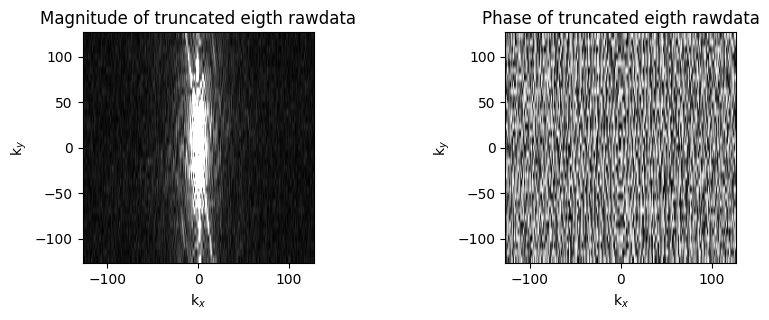

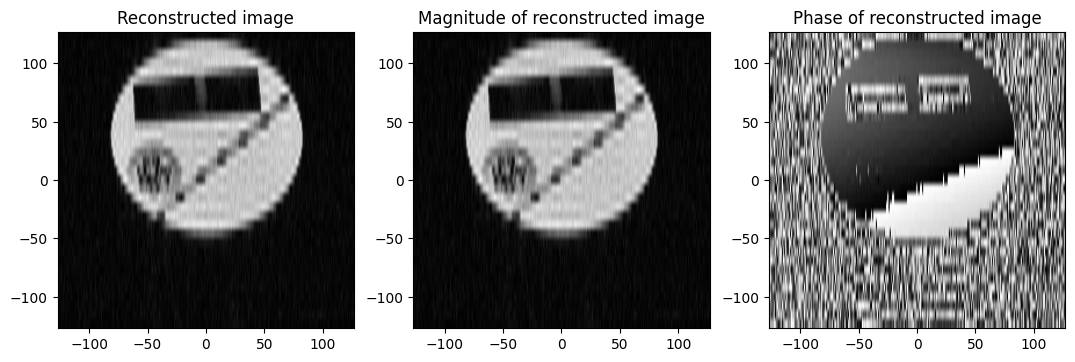

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3))
ax1.imshow(np.abs(rawdata_truncatedeigth),  vmax= np.abs(rawdata_truncatedeigth).max()/30, cmap='gray', extent=extent)
ax1.set_title('Magnitude of truncated eigth rawdata')
ax1.set_xlabel('k$_x$')
ax1.set_ylabel('k$_y$')
ax2.imshow(np.angle(rawdata_truncatedeigth), cmap='gray', extent=extent)
ax2.set_title('Phase of truncated eigth rawdata')
ax2.set_xlabel('k$_x$')
ax2.set_ylabel('k$_y$')
plt.show()

# reconstruct the image by fourier transform with numpy

img_truncated_eigth = np.fft.fftshift(np.fft.ifft2(np.fft.ifftshift(rawdata_truncatedeigth)))
#plt.imshow(np.abs(img_truncated_eigth), cmap='gray', extent=extent)
#plt.title('Reconstructed image')
#plt.show()

# display magnitude and phase of the reconstructed image

#fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 5))
#ax1.imshow(np.abs(img_truncated_eigth), cmap='gray', extent=extent)
#ax1.set_title('Magnitude of reconstructed image')
#ax2.imshow(np.angle(img_truncated_eigth), cmap='gray', extent=extent)
#ax2.set_title('Phase of reconstructed image')
#plt.show()

# display a subplot (1,3) with the reconstructed image and the magnitude and phase of the reconstructed image

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(13, 5))
ax1.imshow(np.abs(img_truncated_eigth), cmap='gray', extent=extent)
ax1.set_title('Reconstructed image')
ax2.imshow(np.abs(img_truncated_eigth), cmap='gray', extent=extent)
ax2.set_title('Magnitude of reconstructed image')
ax3.imshow(np.angle(img_truncated_eigth), cmap='gray', extent=extent)
ax3.set_title('Phase of reconstructed image')
plt.show()


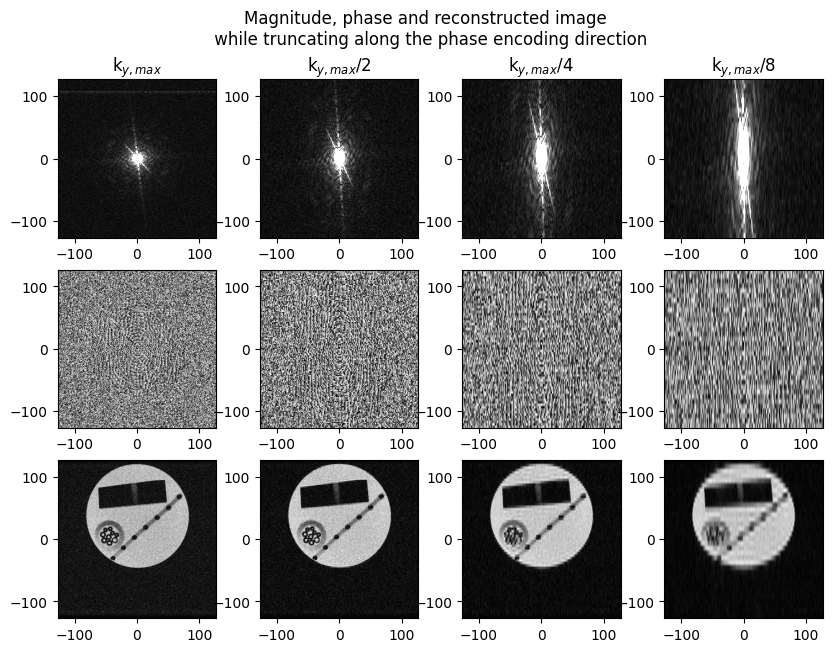

In [12]:

fig, ax = plt.subplots(3,4, figsize=(10, 7))
ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11,ax12 = ax.flatten()
ax1.imshow(np.abs(data['rawdata']),  vmax= np.abs(data['rawdata']).max()/30, cmap='gray', extent=extent)
ax1.set_title('k$_{y,max}$')
ax2.imshow(np.abs(rawdata_truncated),  vmax= np.abs(rawdata_truncated).max()/30, cmap='gray', extent=extent)
ax2.set_title('k$_{y,max}$/2')
ax3.imshow(np.abs(rawdata_truncatedfourth),  vmax= np.abs(rawdata_truncatedfourth).max()/30, cmap='gray', extent=extent)
ax3.set_title('k$_{y,max}$/4')
ax4.imshow(np.abs(rawdata_truncatedeigth),  vmax= np.abs(rawdata_truncatedeigth).max()/30, cmap='gray', extent=extent)
ax4.set_title('k$_{y,max}$/8')
ax5.imshow(np.angle(data['rawdata']), cmap='gray', extent=extent)
ax6.imshow(np.angle(rawdata_truncated), cmap='gray', extent=extent)
ax7.imshow(np.angle(rawdata_truncatedfourth), cmap='gray', extent=extent)
ax8.imshow(np.angle(rawdata_truncatedeigth), cmap='gray', extent=extent)
ax9.imshow(np.abs(img), cmap='gray', extent=extent)
ax10.imshow(np.abs(img_truncated), cmap='gray', extent=extent)
ax11.imshow(np.abs(img_truncated_fourth), cmap='gray', extent=extent)
ax12.imshow(np.abs(img_truncated_eigth), cmap='gray', extent=extent)
fig.suptitle('Magnitude, phase and reconstructed image \n while truncating along the phase encoding direction')
plt.show()



Truncating the k-space data (i.e., reducing kmax) by one half, one quarter and one eight along the phase-encoding direction means that we're decreasing in the same proportion either the phase-enconding gradient $(G_y)$ or the time period in which we apply it ($t_{pe}$), which leaves us with less points in the ky axis. We observe blurring. When reducing $k_{y,max}$, it's value will not be enough to sample the high frequency of the edges, ripples will appear leading to ringing (Gibbs ringing), as we can see in the last collumns. These happen because we are sampling an insufficient number of frequencies to perfectly reconstruct the signal using a Fourier transform. In theory, a signal is an infinite summation of frequencies. In MR imaging, we are restricted to smapling only a couple frequencies, so Gibbs ringing is always present, however, after truncating the phase-enconding region it is even more noticeable.

$$
k_y\left(t_{p e}\right)=\frac{\gamma}{2 \pi} \int_0^{t_{p e}} G_y(y) d t^{\prime}
$$

As we're reducing $k_{y,max}$ by one half, one quarter and one eight we're increasing the value of the δ 2x, 4x, 8x, respectively, therefore deteriorating the spatial resolution.

### 4. Repeat 1-2, by under-sampling the k-space data (i.e., leaving kmax unchanged and increasing Δk) by half along the phase-encoding direction.

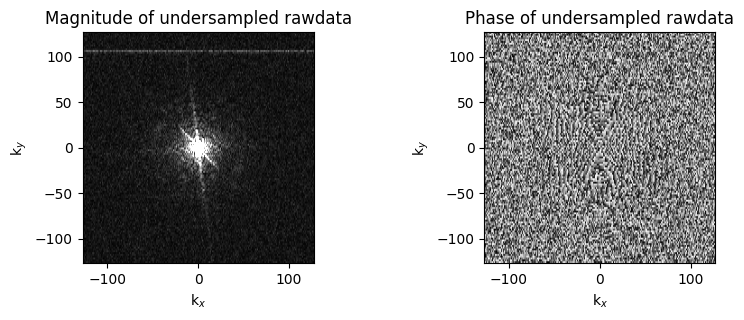

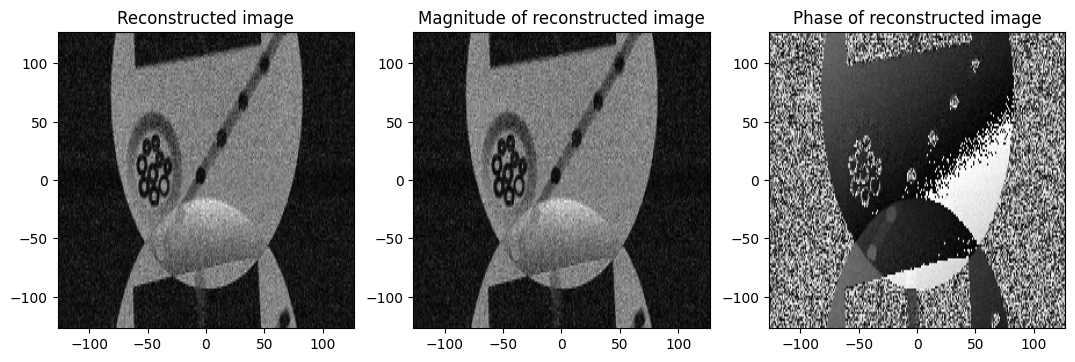

In [13]:
# undersample the k space data by half (i.e leave kmax unchanged but increased delta k)

rawdata_undersampled = data['rawdata'][::2,:] # skips one every two samples (reduces the number of samples by half)

# get magnitue and phase of the undersampled raw data

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9.5, 3))
ax1.imshow(np.abs(rawdata_undersampled), cmap='gray', vmax= np.abs(rawdata_undersampled).max()/30, extent=extent)
ax1.set_title('Magnitude of undersampled rawdata')
ax1.set_xlabel('k$_x$')
ax1.set_ylabel('k$_y$')
ax2.imshow(np.angle(rawdata_undersampled), cmap='gray', extent=extent)
ax2.set_title('Phase of undersampled rawdata')
ax2.set_xlabel('k$_x$')
ax2.set_ylabel('k$_y$')
plt.show()

# reconstruct the image by fourier transform with numpy

img_undersampled = np.fft.fftshift(np.fft.ifft2(np.fft.ifftshift(rawdata_undersampled)))
#plt.imshow(np.abs(img_undersampled), cmap='gray', extent=extent)
#plt.title('Reconstructed image')
#plt.show()

# display magnitude and phase of the reconstructed image

#fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 5))
#ax1.imshow(np.abs(img_undersampled), cmap='gray', extent=extent)
#ax1.set_title('Magnitude of reconstructed image')
#ax2.imshow(np.angle(img_undersampled), cmap='gray', extent=extent)
#ax2.set_title('Phase of reconstructed image')
#plt.show()

# display a subplot (1,3) with the reconstructed image and the magnitude and phase of the reconstructed image

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(13, 5))
ax1.imshow(np.abs(img_undersampled), cmap='gray', extent=extent)
ax1.set_title('Reconstructed image')
ax2.imshow(np.abs(img_undersampled), cmap='gray', extent=extent)
ax2.set_title('Magnitude of reconstructed image')
ax3.imshow(np.angle(img_undersampled), cmap='gray', extent=extent)
ax3.set_title('Phase of reconstructed image')
plt.show()




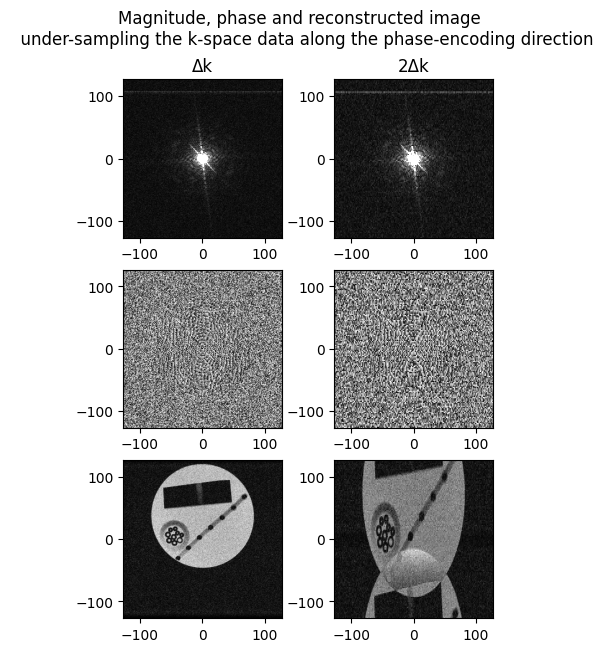

In [14]:
fig, ax = plt.subplots(3,2, figsize=(5, 7))
ax1, ax2, ax3, ax4, ax5, ax6 = ax.flatten()
ax1.imshow(np.abs(data['rawdata']),  vmax= np.abs(data['rawdata']).max()/30, cmap='gray', extent=extent)
ax1.set_title('Δk')
ax2.imshow(np.abs(rawdata_undersampled),  vmax= np.abs(rawdata_undersampled).max()/30, cmap='gray', extent=extent)
ax2.set_title('2Δk')
ax3.imshow(np.angle(data['rawdata']), cmap='gray', extent=extent)
ax4.imshow(np.angle(rawdata_undersampled), cmap='gray', extent=extent)
ax5.imshow(np.abs(img), cmap='gray', extent=extent)
ax6.imshow(np.abs(img_undersampled), cmap='gray', extent=extent)
fig.suptitle('Magnitude, phase and reconstructed image \n  under-sampling the k-space data along the phase-encoding direction')
plt.show()

If Δk is not small enough, we won't sample the k-space finely enough, as we'll be decreasing the sample frequency. It should be at least 2x the max frequency, according to Nyquist. This leads to parts of the image being represented inside of it, since we're reducing the available FOV (inversely proportional to Δk) by one half, in a “wrap-around” folded image (due to the dimensions of the object exceeding the FOV and therefore folding over into the region of interest.)

$F O V_y=\frac{1}{\Delta k_y}=\frac{1}{\frac{\gamma}{2 \pi} \Delta G_y t_{p e}}$

We can change the value of Δk by tuning the phase-enconding gradient step ($\Delta G_y$) or by changing the time period in which we apply it ($t_{pe}$).

There is some tradeoff between a very good spatial resolution and a large FOV. For a great spatial resolution, we need small Δk, which implies that if we want a large FOV we need to acquire many points, which in the $k_{y}$ axis means larger imaging time (which is not ideal).

### 5. Repeat 1-2, by considering half Fourier imaging along the phase-encoding direction, i.e., sampling only half the phase-encoding steps and then using Hermitian symmetry to obtain a full k-space before image reconstruction

In [15]:
rawdata_half = data['rawdata'][0:128,:]
rawdata_hermitian= np.flip(np.flip(np.conjugate(rawdata_half), axis=0), axis=1)
data_half_hermitian = np.append(rawdata_half, rawdata_hermitian, axis=0)

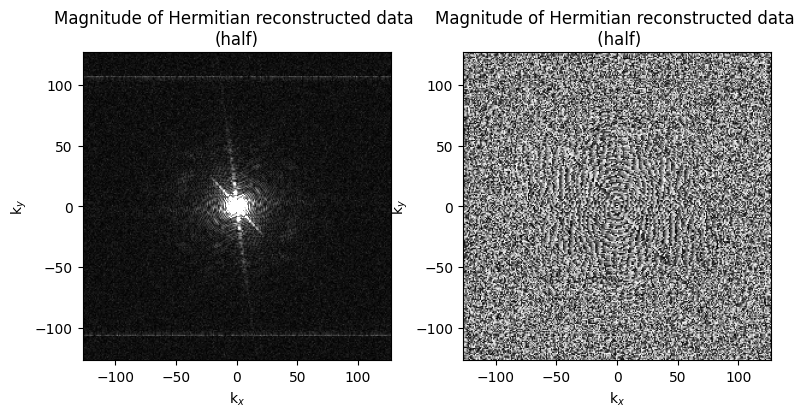

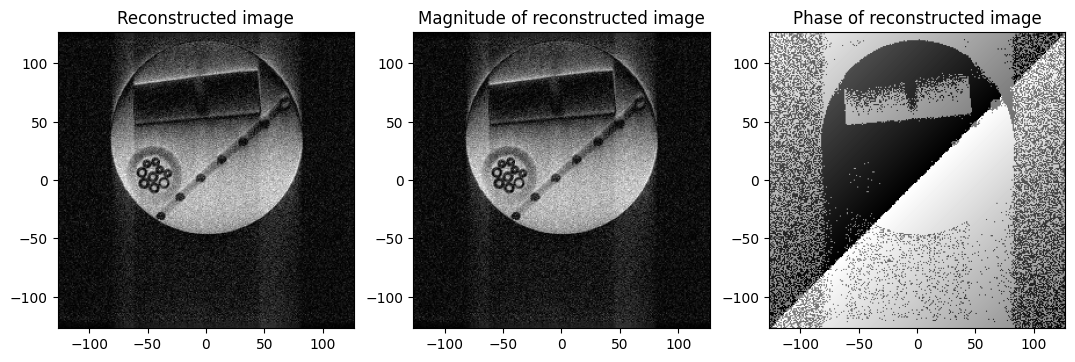

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 4))
ax1.imshow(np.abs(data_half_hermitian), cmap='gray', vmax= np.abs(data_half_hermitian).max()/30, extent=extent)
ax1.set_title('Magnitude of Hermitian reconstructed data \n(half)')
ax1.set_xlabel('k$_x$')
ax1.set_ylabel('k$_y$')
ax2.imshow(np.angle(data_half_hermitian), cmap='gray', extent=extent)
ax2.set_title('Magnitude of Hermitian reconstructed data \n (half)')
ax2.set_xlabel('k$_x$')
ax2.set_ylabel('k$_y$')
plt.show()

# reconstruct the image by fourier transform with numpy

img_halfhermitian = np.fft.fftshift(np.fft.ifft2(np.fft.ifftshift(data_half_hermitian)))
#plt.imshow(np.abs(img_halfhermitian), cmap='gray', extent=extent)
#plt.title('Reconstructed image')
#plt.show()

# display magnitude and phase of the reconstructed image

#fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 5))
#ax1.imshow(np.abs(img_halfhermitian), cmap='gray', extent=extent)
#ax1.set_title('Magnitude of reconstructed image')
#ax2.imshow(np.angle(img_halfhermitian), cmap='gray', extent=extent)
#ax2.set_title('Phase of reconstructed image')
#plt.show()

# display a subplot (1,3) with the reconstructed image and the magnitude and phase of the reconstructed image

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(13, 5))
ax1.imshow(np.abs(img_halfhermitian), cmap='gray', extent=extent)
ax1.set_title('Reconstructed image')
ax2.imshow(np.abs(img_halfhermitian), cmap='gray', extent=extent)
ax2.set_title('Magnitude of reconstructed image')
ax3.imshow(np.angle(img_halfhermitian), cmap='gray', extent=extent)
ax3.set_title('Phase of reconstructed image')
plt.show()



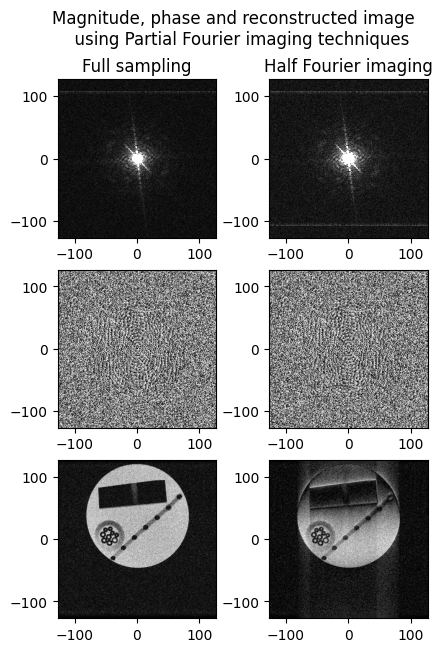

In [17]:
fig, ax = plt.subplots(3,2, figsize=(5, 7))
ax1, ax2, ax3, ax4, ax5, ax6 = ax.flatten()
ax1.imshow(np.abs(data['rawdata']),  vmax= np.abs(data['rawdata']).max()/30, cmap='gray', extent=extent)
ax1.set_title('Full sampling')
ax2.imshow(np.abs(data_half_hermitian),  vmax= np.abs(rawdata_undersampled).max()/30, cmap='gray', extent=extent)
ax2.set_title('Half Fourier imaging')
ax3.imshow(np.angle(data['rawdata']), cmap='gray', extent=extent)
ax4.imshow(np.angle(data_half_hermitian), cmap='gray', extent=extent)
ax5.imshow(np.abs(img), cmap='gray', extent=extent)
ax6.imshow(np.abs(img_halfhermitian), cmap='gray', extent=extent)
fig.suptitle('Magnitude, phase and reconstructed image \n  using Partial Fourier imaging techniques')
plt.show()

Partial Fourier imaging techniques are reconstruction methods in which data from as little as one-half of k-space is used to generate an entire MR image. This result derives from the fact that some of the information in k-space is redundant. Provided no phase errors occur during data collection, k-space possesses a peculiar mirrored property known as conjugate (or Hermitian) symmetry. The practical result of conjugate symmetry is that, in theory, only half of k-space data needs to be collected and the other half can be estimated. This can be translated into a reduction in imaging time, reduction in minimum echo time, or both. 
All image data sets contain some phase errors, and therefore the conjugate symmetry approximations are not perfect.  The sources of these phase errors include the usual "suspects": Bo inhomogeneity, susceptibility effects, eddy currents, physiologic motion, and spatial variations in transmit RF uniformity or surface coil sensitivity.

It is important to reduce try to reduce the number of samples needed, especially along the phase encoding region. Getting more points in the phase enconding region, although resulting in a better image, comes at great costs in terms of time. In the phase encoding direction, additional encoding gradients need to be applied and the data must be acquired after each gradient. This process takes time, and acquiring more samples in the phase encoding direction increases the total scan time. In practice, we often need fast MRI results. For this reason, sampling only half of the $k_{y}$ and using Hermitian symmetry on the other half can be a solution.

In [18]:
np.allclose(data['rawdata'], np.flip(np.flip(np.conjugate(data['rawdata']),axis=0), axis=1))

False

### 6. Repeat 5, by considering 5/8 partial Fourier imaging. i.e., by adding 1/8 of the data points in the unsampled half of k-space. Explain the observed differences relative to 5

In [19]:
rawdata_five_eights = data['rawdata'][0:160,:]
rawdata_hermitian_five_eights= np.flip(np.flip(np.conjugate(rawdata_five_eights[0:96]), axis=0), axis=1)
data_five_eights_hermitian = np.append(rawdata_five_eights, rawdata_hermitian_five_eights, axis=0)

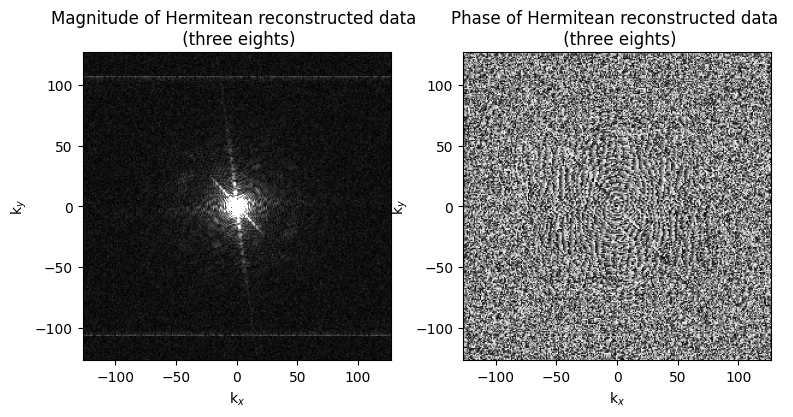

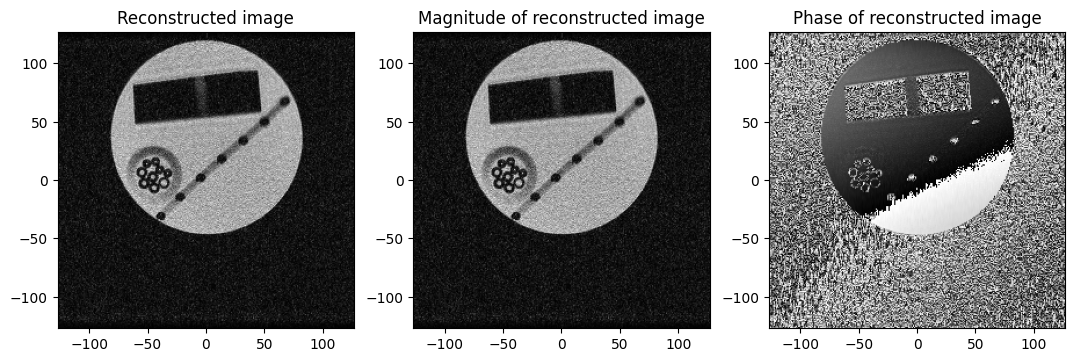

In [20]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 4))
ax1.imshow(np.abs(data_five_eights_hermitian), cmap='gray', vmax= np.abs(data_five_eights_hermitian).max()/30, extent=extent)
ax1.set_title('Magnitude of Hermitean reconstructed data \n (three eights)')
ax1.set_xlabel('k$_x$')
ax1.set_ylabel('k$_y$')
ax2.imshow(np.angle(data_five_eights_hermitian), cmap='gray', extent=extent)
ax2.set_title('Phase of Hermitean reconstructed data \n (three eights)')
ax2.set_xlabel('k$_x$')
ax2.set_ylabel('k$_y$')
plt.show()

# reconstruct the image by fourier transform with numpy

img_eightshermitian = np.fft.fftshift(np.fft.ifft2(np.fft.ifftshift(data_five_eights_hermitian)))
#plt.imshow(np.abs(img_eightshermitian), cmap='gray', extent=extent)
#plt.title('Reconstructed image')
#plt.show()

# display magnitude and phase of the reconstructed image

#fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 5))
#ax1.imshow(np.abs(img_eightshermitian), cmap='gray', extent=extent)
#ax1.set_title('Magnitude of reconstructed image')
#ax2.imshow(np.angle(img_eightshermitian), cmap='gray', extent=extent)
#ax2.set_title('Phase of reconstructed image')
#plt.show()

# display a subplot (1,3) with the reconstructed image and the magnitude and phase of the reconstructed image

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(13, 5))
ax1.imshow(np.abs(img_eightshermitian), cmap='gray', extent=extent)
ax1.set_title('Reconstructed image')
ax2.imshow(np.abs(img_eightshermitian), cmap='gray', extent=extent)
ax2.set_title('Magnitude of reconstructed image')
ax3.imshow(np.angle(img_eightshermitian), cmap='gray', extent=extent)
ax3.set_title('Phase of reconstructed image')
plt.show()


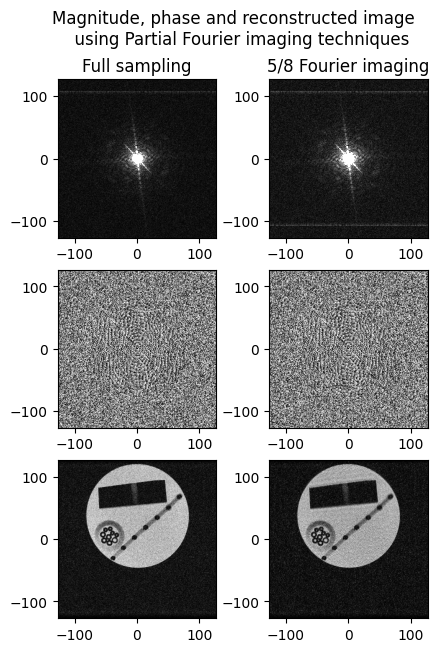

In [21]:
fig, ax = plt.subplots(3,2, figsize=(5, 7))
ax1, ax2, ax3, ax4, ax5, ax6 = ax.flatten()
ax1.imshow(np.abs(data['rawdata']),  vmax= np.abs(data['rawdata']).max()/30, cmap='gray', extent=extent)
ax1.set_title('Full sampling')
ax2.imshow(np.abs(data_five_eights_hermitian),  vmax= np.abs(rawdata_undersampled).max()/30, cmap='gray', extent=extent)
ax2.set_title('5/8 Fourier imaging')
ax3.imshow(np.angle(data['rawdata']), cmap='gray', extent=extent)
ax4.imshow(np.angle(data_five_eights_hermitian), cmap='gray', extent=extent)
ax5.imshow(np.abs(img), cmap='gray', extent=extent)
ax6.imshow(np.abs(img_eightshermitian), cmap='gray', extent=extent)
fig.suptitle('Magnitude, phase and reconstructed image \n  using Partial Fourier imaging techniques')
plt.show()

Therefore, partial Fourier techniques require sampling of slightly more than half the lines of k-space (typically about 60% for routine imaging, more for echo-planar imaging).  These extra lines are then used to generate phase correction maps of k-space, allowing a more accurate prediction of missing values